# Import necessary depencencies

In [1]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu
import nltk
import textblob

np.set_printoptions(precision=2, linewidth=80)

# Load normalized data

In [2]:
df = pd.read_csv('fb_ads.csv')
df=df[df['normtext'].notna()]
df
corpus = np.array(df['normtext'])


In [4]:
#get list of candidates: overall and by party
can=df.page_name.unique()
dem = df[df['party']=="D"]
rep = df[df['party']=="R"]
dem_can=dem.page_name.unique()
rep_can=rep.page_name.unique()

## Sentiment Analysis with Vader

### Import Dependencies

In [6]:
# import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
# function to print sentiments
def analyze_sentiment_vader_lexicon(corpus, 
                                    threshold=0.1,
                                    verbose=False):
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(corpus)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']], 
                                                              codes=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)
    
    return final_sentiment  

In [25]:
df['sentiment']=df['normtext'].apply(analyze_sentiment_vader_lexicon)
df

,party,page_name,text,normtext,sentiment
0,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...,positive
1,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...,positive
2,D,Patty Murray,Efforts to undermine our fair and free electio...,effort undermine fair free election put democr...,negative
3,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...,positive
4,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...,positive
...,...,...,...,...,...
40727,R,Dr. Mehmet Oz,It is time to put the people in control of the...,time put people control health insane drug pri...,negative
40728,R,Dr. Mehmet Oz,"As a Doctor and TV host, I took on the medical...",doctor tv host take medical establishment sena...,negative
40729,R,Dr. Mehmet Oz,It is time we set Washington straight on their...,time set washington straight covid response li...,positive
40730,R,Dr. Mehmet Oz,I am running to empower the people of PA and A...,run empower people pa america take look stand ...,negative


In [20]:
df.to_csv('fbads_sentiments.csv')

## Plot Results

### plots for all candidates

Text(0.5, 0, 'Frequency')

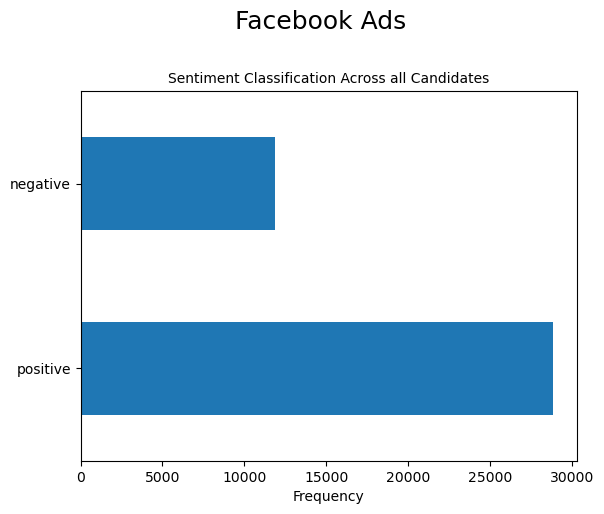

In [23]:
import matplotlib.pyplot as plt

#histogram of frequencies
df['sentiment'].value_counts().plot(kind='barh')
plt.suptitle('Facebook Ads', y=1.05, fontsize=18)
plt.title('Sentiment Classification Across all Candidates', fontsize=10)
plt.xlabel('Frequency')

Text(0.5, 1.0, 'Sentiment Classification Across all Candidates')

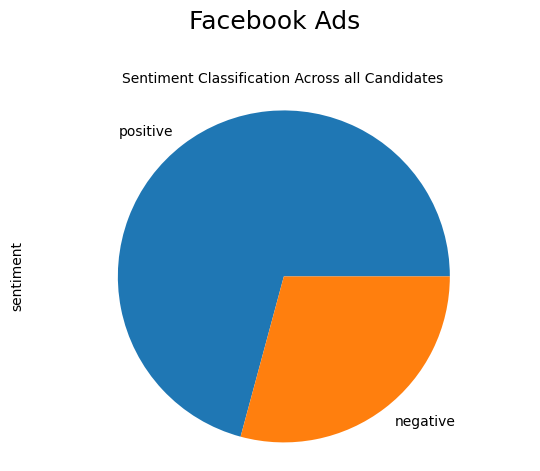

In [24]:
#Pie chart
df['sentiment'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.suptitle('Facebook Ads', y=1.05, fontsize=18)
plt.title('Sentiment Classification Across all Candidates', fontsize=10)

### plot for Republican candidates

In [28]:
df.apply(lambda x: pd.Series([1,5],  index=['party', 'sentiment']), axis=1)

,party,sentiment
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5
...,...,...
40727,1,5
40728,1,5
40729,1,5
40730,1,5


In [ ]:
#Pie chart
#df['sentiment'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.suptitle('Facebook Ads', y=1.05, fontsize=18)
plt.title('Sentiment Classification Among Republican Candidates', fontsize=10)

### plot for Democratic candidates

In [ ]:
#Pie chart
#df['sentiment'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.suptitle('Facebook Ads', y=1.05, fontsize=18)
plt.title('Sentiment Classification Among Democratic Candidates', fontsize=10)

# Sentiment Analysis with AFINN

In [5]:
from afinn import Afinn

afn = Afinn(emoticons=True) 

## Predict sentiment

In [6]:
#initialize indexes
pos_index = []
neg_index = []


In [7]:

pos = 0
neg = 0
score=[]
for ad in corpus:
    score.append(afn.score(ad))


In [8]:
df['score']=score
df[df['page_name']=='Patty Murray'].mean()


C:\Users\13108\AppData\Local\Temp\ipykernel_12436\1550624869.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['page_name']=='Patty Murray'].mean()


score    3.356913
dtype: float64

## Plot results

<AxesSubplot:>

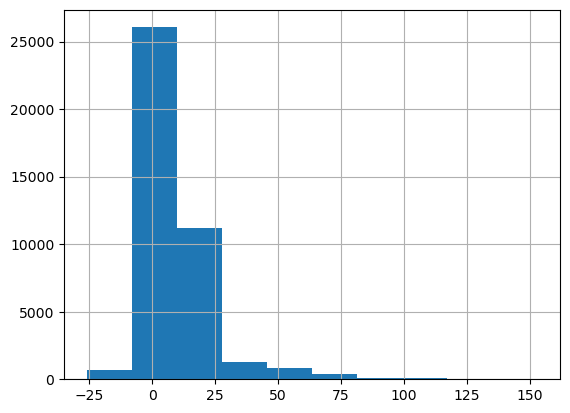

In [9]:
#Histogram average sentiment score (all candidates)
df['score'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

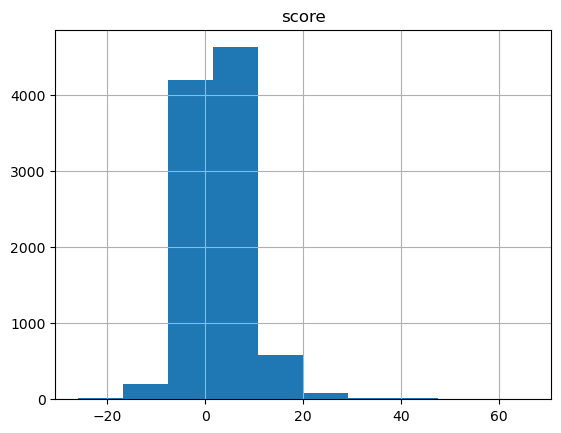

In [14]:
#plot scores for all Republicans
df[df['party']=='R'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

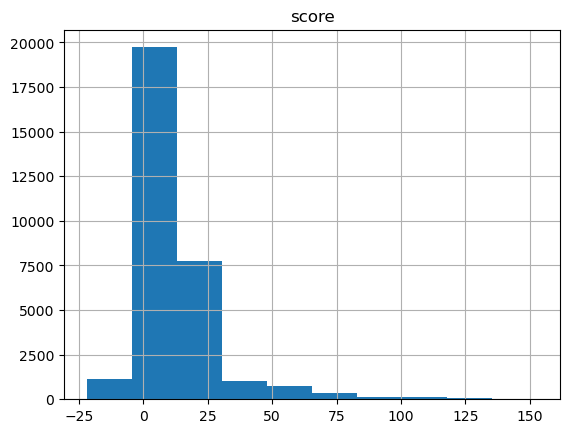

In [15]:
#plot scores for all Democrats
df[df['party']=='D'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

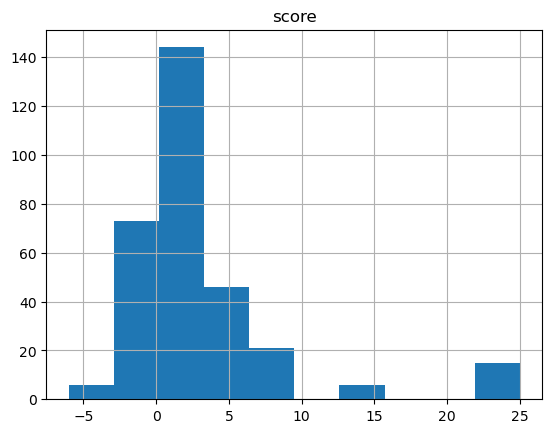

In [10]:
#Histogram for Patty Murray's (Democrat) avg ad sentiment
df[df['page_name']=='Patty Murray'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

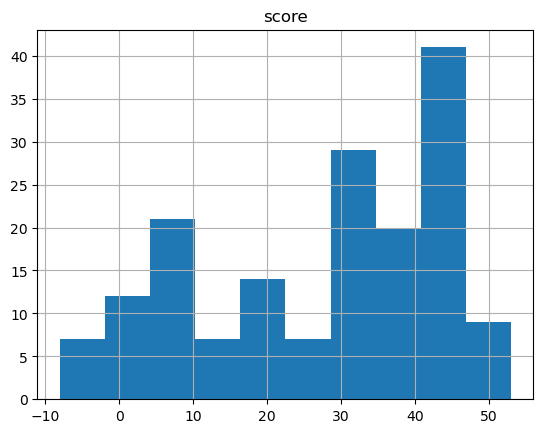

In [11]:
#Histogram for Alex Padilla's (Democrat) avg ad sentiment
df[df['page_name']=='Alex Padilla'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

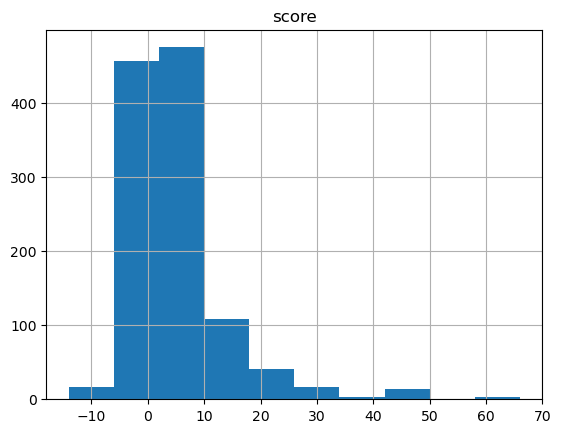

In [12]:
#Histogram for Marco Rubios's (Republican) avg ad sentiment
df[df['page_name']=='Marco Rubio'].hist()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

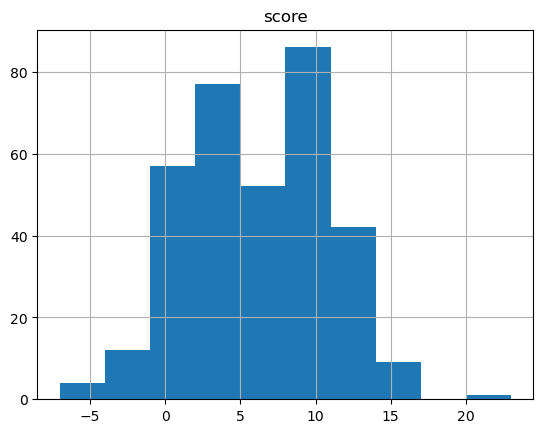

In [13]:
#Histogram for Tim Scott's (Republican) avg ad sentiment
df[df['page_name']=='Tim Scott'].hist()